# Today's Date -  17 July 2023

#Importing dataset from Kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d msambare/fer2013

 96% 58.0M/60.3M [00:03<00:00, 24.7MB/s]
100% 60.3M/60.3M [00:03<00:00, 17.9MB/s]


In [4]:
import zipfile
zip_path = '/content/fer2013.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

#Importing Libraries

In [9]:
import cv2
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential, load_model, Model
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from keras.applications import VGG16, InceptionResNetV2
from keras.optimizers import Adam,RMSprop,SGD,Adamax

#Preparing the data

In [12]:
train_dir = '/content/train'
test_dir = '/content/test'
img_size = 48

In [10]:
train_datagen = ImageDataGenerator(width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   horizontal_flip = True,
                                   rescale = 1./255,
                                   validation_split = 0.2)
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                        validation_split = 0.2)

In [13]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training")
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation")

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


#Model Architecture

In [14]:
model= Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       2

In [16]:
model.compile(optimizer = Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit(x=train_generator, epochs=70, validation_data=validation_generator)

Epoch 1/70
359/359 [==============================] - 36s 68ms/step - loss: 9.2977 - accuracy: 0.1940 - val_loss: 8.9326 - val_accuracy: 0.2514
Epoch 2/70
359/359 [==============================] - 23s 63ms/step - loss: 8.2894 - accuracy: 0.2355 - val_loss: 7.6760 - val_accuracy: 0.2772
Epoch 3/70
359/359 [==============================] - 22s 61ms/step - loss: 7.2946 - accuracy: 0.2722 - val_loss: 6.6125 - val_accuracy: 0.3122
Epoch 4/70
359/359 [==============================] - 22s 62ms/step - loss: 6.3538 - accuracy: 0.2910 - val_loss: 5.7345 - val_accuracy: 0.3527
Epoch 5/70
359/359 [==============================] - 23s 63ms/step - loss: 5.4905 - accuracy: 0.3158 - val_loss: 4.9161 - val_accuracy: 0.3694
Epoch 6/70
359/359 [==============================] - 22s 60ms/step - loss: 4.7246 - accuracy: 0.3439 - val_loss: 4.3492 - val_accuracy: 0.3827
Epoch 7/70
359/359 [==============================] - 22s 62ms/step - loss: 4.0950 - accuracy: 0.3724 - val_loss: 3.8686 - val_accuracy:

In [19]:
model.save('emotion.h5')

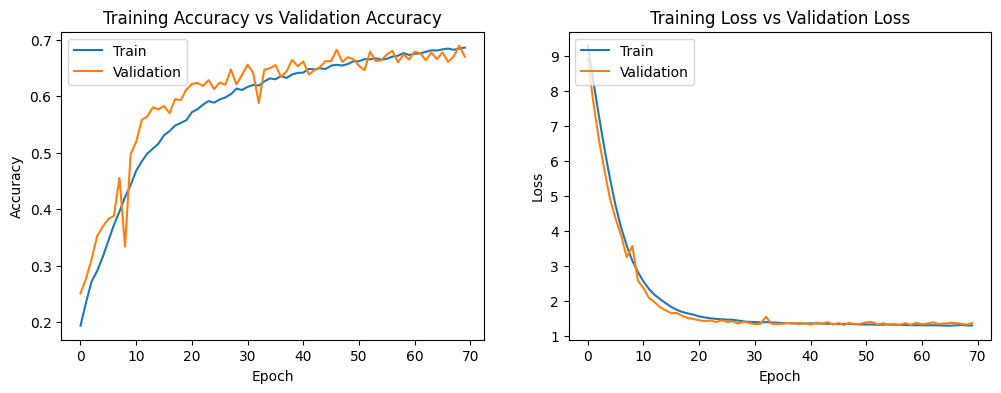

In [20]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

#Testing the model

In [59]:
model.input_shape

(None, 48, 48, 1)

In [33]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

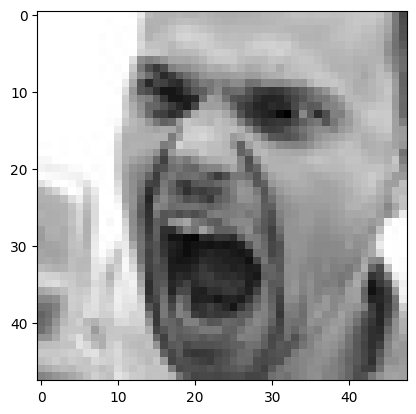

(1, 48, 48, 1)
[1.4559464e-30, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]


In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

img_path = '/content/angry.jpg'
img = load_img(img_path, target_size=(48, 48), color_mode="grayscale")
img = np.array(img)
img = img.reshape(1, 48, 48, 1)

plt.imshow(img.squeeze(), cmap='gray')  # Use .squeeze() to remove the single dimension for display
plt.show()

print(img.shape)

result = model.predict(img, verbose=0)
result = list(result[0])
print(result)

In [58]:
img_index = result.index(max(result))
print(label_dict[img_index])

Fear
